# Data 698 : Research project

# Predicting Hospital Readmission for Diabetes

### Import Required Packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import plotly as py
from plotly import tools
import seaborn as sns
import dexplot as dxp

### Read Diabetes Data file

In [27]:
patient_df = pd.read_csv('diabetic_data.csv')

## Data Wrangling

In [28]:
patient_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [30]:
patient_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


__Count Number of rows for Readmission field__

In [31]:
patient_df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

__Count Number of rows for Disposition Id field__

In [32]:
patient_df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

__Check if there any missing values in the dataset__

In [33]:
for col in patient_df.columns:
    if patient_df[col].dtype == object:
         print(col,patient_df[col][patient_df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


## Data Exploration and Analysis

**Plot to Analyze Readmissions**

Text(0.5, 1.0, 'Count of Patient Readmissions')

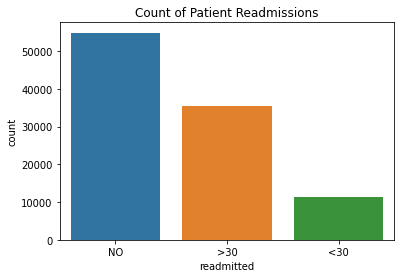

In [34]:
sns.countplot(patient_df['readmitted']).set_title('Count of Patient Readmissions')

**Plot to analyze Race field**

Text(0.5, 1.0, 'Readmission Count by Race')

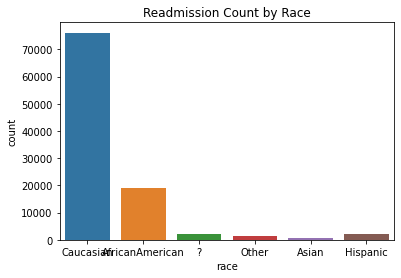

In [35]:
sns.countplot(patient_df['race']).set_title('Readmission Count by Race')

**Plot to analyze Gender field**

Text(0.5, 1.0, 'Readmission Count by Gender')

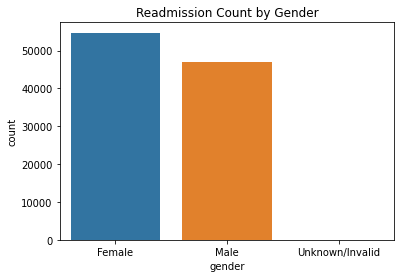

In [36]:
sns.countplot(patient_df['gender']).set_title('Readmission Count by Gender')

**Plot to analyze Age Vs Readmission**

Text(0.5, 1.0, 'Age VS. Readmission')

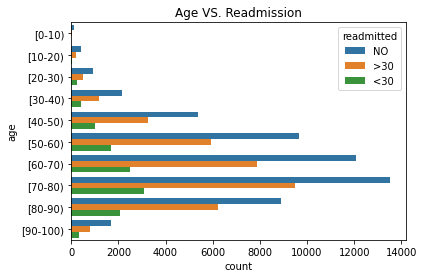

In [37]:
sns.countplot(y= patient_df['age'], hue = patient_df['readmitted']).set_title('Age VS. Readmission')

**Plot to analyze Race Vs Readmission**

Text(0.5, 1.0, 'Race Vs Readmission Aggregated count')

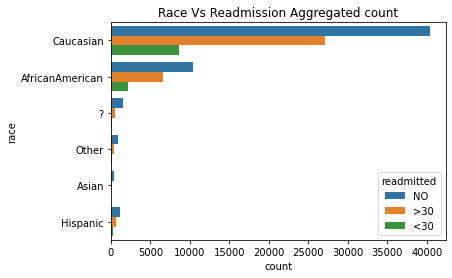

In [38]:
sns.countplot(y = patient_df['race'], hue = patient_df['readmitted']).set_title('Race Vs Readmission Aggregated count')

**Plot to analyze Gender Vs Readmission**

Text(0.5, 1.0, 'Gender VS. Readmission')

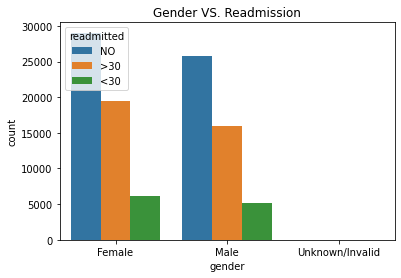

In [39]:
sns.countplot(patient_df['gender'], hue = patient_df['readmitted']).set_title("Gender VS. Readmission")

**Plot to analyze Diabetes Medication Prescribed Vs Readmission**

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

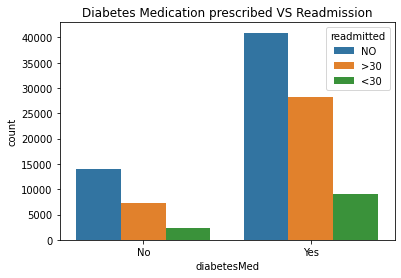

In [40]:
sns.countplot(patient_df['diabetesMed'], hue = patient_df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [41]:
patient_df['readmitted_30'] = patient_df['readmitted'].apply(lambda x: 0 if x.strip()=='NO' else 1)

In [42]:
patientdata_df = patient_df

In [43]:
patientdata_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_30
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


#### Here we will drop the column readmitted as we created a new column readmitted_30 for our usage

In [44]:
patientdata_df.drop('readmitted', 1, inplace=True)

In [45]:
patientdata_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_30
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [46]:
wantedcols = ['age', 'gender','race', 'admission_source_id', 'insulin', 'time_in_hospital', 'change', 'num_lab_procedures',
              'number_inpatient', 'number_outpatient', 'number_diagnoses', 'num_medications', 'number_emergency', 'readmitted_30' ]
patientdata1 = patientdata_df[wantedcols]

In [47]:
from matplotlib import pyplot 
patientdata1.corr().style.format("{:.2}").background_gradient(cmap=pyplot .get_cmap('PRGn'),axis=1)

,admission_source_id,time_in_hospital,num_lab_procedures,number_inpatient,number_outpatient,number_diagnoses,num_medications,number_emergency,readmitted_30
admission_source_id,1.0,-0.007,0.049,0.036,0.027,0.072,-0.055,0.06,0.04
time_in_hospital,-0.007,1.0,0.32,0.074,-0.0089,0.22,0.47,-0.0097,0.051
num_lab_procedures,0.049,0.32,1.0,0.039,-0.0076,0.15,0.27,-0.0023,0.039
number_inpatient,0.036,0.074,0.039,1.0,0.11,0.1,0.064,0.27,0.22
number_outpatient,0.027,-0.0089,-0.0076,0.11,1.0,0.094,0.045,0.091,0.082
number_diagnoses,0.072,0.22,0.15,0.1,0.094,1.0,0.26,0.056,0.11
num_medications,-0.055,0.47,0.27,0.064,0.045,0.26,1.0,0.013,0.047
number_emergency,0.06,-0.0097,-0.0023,0.27,0.091,0.056,0.013,1.0,0.1
readmitted_30,0.04,0.051,0.039,0.22,0.082,0.11,0.047,0.1,1.0


#### Filter dummy values

In [48]:
dummy_df = pd.get_dummies(patientdata1)

In [49]:
dummy_df.head()

,admission_source_id,time_in_hospital,num_lab_procedures,number_inpatient,number_outpatient,number_diagnoses,num_medications,number_emergency,readmitted_30,age_[0-10),...,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No
0,1,1,41,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,7,3,59,0,0,9,18,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,7,2,11,1,2,6,13,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,7,2,44,0,0,7,16,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,7,1,51,0,0,5,8,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [50]:
from matplotlib import pyplot 
dummy_df.corr().style.format("{:.2}").background_gradient(cmap=pyplot .get_cmap('bwr'),axis=1)

,admission_source_id,time_in_hospital,num_lab_procedures,number_inpatient,number_outpatient,number_diagnoses,num_medications,number_emergency,readmitted_30,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),gender_Female,gender_Male,gender_Unknown/Invalid,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No
admission_source_id,1.0,-0.007,0.049,0.036,0.027,0.072,-0.055,0.06,0.04,-0.0011,-0.0029,-0.0038,-0.0021,0.0044,-0.024,-0.046,0.0059,0.052,0.037,0.0038,-0.0038,-0.001,-0.027,-0.019,-0.004,0.023,0.014,-0.00044,0.027,-0.013,-0.0098,0.0066,0.0024,-0.0024
time_in_hospital,-0.007,1.0,0.32,0.074,-0.0089,0.22,0.47,-0.0097,0.051,-0.025,-0.033,-0.036,-0.039,-0.039,-0.041,-0.0025,0.038,0.062,0.02,0.03,-0.03,-0.0019,-0.0054,0.018,-0.011,-0.0059,-0.016,-0.005,0.065,-0.099,-0.007,0.1,0.11,-0.11
num_lab_procedures,0.049,0.32,1.0,0.039,-0.0076,0.15,0.27,-0.0023,0.039,-0.0042,5.5e-06,-0.00019,-0.00062,-0.0051,-0.011,-0.013,0.0018,0.023,0.014,0.0031,-0.003,-0.0025,0.0078,0.024,-0.0076,-0.023,-0.0022,0.0021,0.061,-0.093,0.009,0.072,0.064,-0.064
number_inpatient,0.036,0.074,0.039,1.0,0.11,0.1,0.064,0.27,0.22,-0.017,-0.0067,0.072,0.02,0.023,-0.0073,-0.012,-0.012,-0.0094,-0.01,0.015,-0.015,-0.0027,-0.039,0.025,-0.0097,-0.0018,-0.0028,-0.018,0.064,-0.07,-0.0067,0.054,0.024,-0.024
number_outpatient,0.027,-0.0089,-0.0076,0.11,1.0,0.094,0.045,0.091,0.082,-0.011,-0.013,-0.00031,-0.012,-0.01,-0.015,0.0079,0.011,0.017,-0.013,0.011,-0.011,-0.0016,-0.021,-0.049,-0.013,0.058,-0.0051,-0.011,0.0078,-0.0049,-0.03,0.044,0.025,-0.025
number_diagnoses,0.072,0.22,0.15,0.1,0.094,1.0,0.26,0.056,0.11,-0.097,-0.15,-0.1,-0.098,-0.079,-0.043,0.023,0.07,0.11,0.04,0.0034,-0.0033,-0.004,-0.057,-0.078,-0.015,0.11,-0.037,-0.015,0.057,-0.08,0.0021,0.064,0.053,-0.053
num_medications,-0.055,0.47,0.27,0.064,0.045,0.26,1.0,0.013,0.047,-0.048,-0.079,-0.064,-0.047,-0.025,0.031,0.074,0.028,-0.039,-0.046,0.022,-0.022,0.00021,-0.0039,-0.039,-0.027,0.056,-0.035,-0.013,0.14,-0.21,0.022,0.16,0.25,-0.25
number_emergency,0.06,-0.0097,-0.0023,0.27,0.091,0.056,0.013,1.0,0.1,-0.0071,-0.0037,0.053,0.062,0.055,0.012,-0.02,-0.042,-0.026,-0.012,0.021,-0.021,-0.0012,-0.025,0.033,-0.0089,-0.022,0.0047,0.0057,0.037,-0.043,-0.02,0.058,0.039,-0.039
readmitted_30,0.04,0.051,0.039,0.22,0.082,0.11,0.047,0.1,1.0,-0.022,-0.013,-0.0028,-0.013,-0.011,-0.019,0.0018,0.024,0.02,-0.02,0.018,-0.018,-0.005,-0.043,-0.0033,-0.017,0.029,-0.012,-0.017,0.05,-0.045,-0.013,0.039,0.046,-0.046
age_[0-10),-0.0011,-0.025,-0.0042,-0.017,-0.011,-0.097,-0.048,-0.0071,-0.022,1.0,-0.0033,-0.0051,-0.0078,-0.013,-0.018,-0.021,-0.023,-0.018,-0.0067,-0.0018,0.0018,-0.00022,-0.0043,-0.0091,0.0031,0.0089,-0.0022,0.0033,-0.0041,-0.023,0.028,0.00086,-0.021,0.021


#### Find colineariaty: create a function to run multi colineariaty test on a dataset having n number of columns and ensure that columns having vif > 5 are dropped together

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [52]:
calculate_vif_(dummy_df)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



dropping 'age_[0-10)' at index: 9
dropping 'gender_Female' at index: 18
dropping 'race_?' at index: 20
dropping 'insulin_Down' at index: 25
dropping 'change_No' at index: 29
dropping 'race_Caucasian' at index: 22
dropping 'number_diagnoses' at index: 5
dropping 'age_[70-80)' at index: 14
dropping 'num_medications' at index: 5
dropping 'num_lab_procedures' at index: 2
Remaining variables:
Index(['admission_source_id', 'time_in_hospital', 'number_inpatient',
       'number_outpatient', 'number_emergency', 'readmitted_30', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[80-90)', 'age_[90-100)', 'gender_Male',
       'gender_Unknown/Invalid', 'race_AfricanAmerican', 'race_Asian',
       'race_Hispanic', 'race_Other', 'insulin_No', 'insulin_Steady',
       'insulin_Up', 'change_Ch'],
      dtype='object')


,admission_source_id,time_in_hospital,number_inpatient,number_outpatient,number_emergency,readmitted_30,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,gender_Male,gender_Unknown/Invalid,race_AfricanAmerican,race_Asian,race_Hispanic,race_Other,insulin_No,insulin_Steady,insulin_Up,change_Ch
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,3,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,7,2,1,2,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,7,2,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
4,7,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,7,3,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
101762,5,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
101763,7,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
101764,7,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [53]:
wantedcols= ['admission_source_id', 'time_in_hospital', 'number_inpatient',
       'number_outpatient', 'number_emergency', 'readmitted_30', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[80-90)', 'age_[90-100)', 'gender_Male',
       'gender_Unknown/Invalid', 'race_AfricanAmerican', 'race_Asian',
       'race_Hispanic', 'race_Other', 'insulin_No', 'insulin_Steady',
       'insulin_Up', 'change_Ch']

In [54]:
dummy_df = dummy_df[wantedcols]

In [55]:
dummy_df.head()

,admission_source_id,time_in_hospital,number_inpatient,number_outpatient,number_emergency,readmitted_30,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,gender_Male,gender_Unknown/Invalid,race_AfricanAmerican,race_Asian,race_Hispanic,race_Other,insulin_No,insulin_Steady,insulin_Up,change_Ch
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,3,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,7,2,1,2,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,7,2,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
4,7,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


## Building Models

In [56]:
maindf = dummy_df

In [57]:
# Here X will contain the patients who are readmitted
X = maindf.drop('readmitted_30', 1)
Y = maindf['readmitted_30']

#### Splitting the data to train and validation

In [58]:
from sklearn.model_selection import train_test_split
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,
                                                          test_size=validation_size,random_state=seed)

#### Algorithms to be evaluated, setting evaluation metrics num_folds, seed and scoring

In [59]:
num_folds=10
seed=7
scoring='accuracy'

In [60]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#### Spot Check Algorithms

In [61]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#### Evaluate each model one at a time

In [62]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sk

LR:0.612883(0.004670)
LDA:0.609615(0.004962)
KNN:0.574092(0.006674)
CART:0.574903(0.003331)
NB:0.478173(0.005675)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled 

SVM:0.619602(0.005751)


#### Compare Algorithm Accuracy

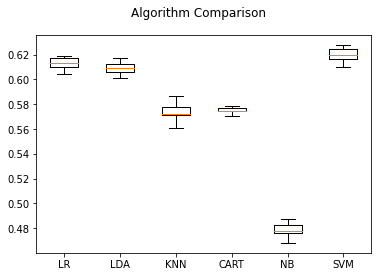

In [39]:
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Make predictions for SVM model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.6225803281910189
[[8357 2612]
 [5070 4315]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.69     10969
           1       0.62      0.46      0.53      9385

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.61     20354



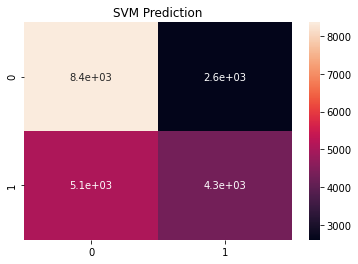

In [72]:
svccls=SVC()
svccls.fit(X_train,Y_train)
predictions=svccls.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
conf_matrix=confusion_matrix(Y_validation,predictions)
print(conf_matrix)
print(classification_report(Y_validation,predictions))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True, ax=ax)
ax.set_title('SVM Prediction')
plt.show()

#### Make predictions for LR model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.6149159870295765
[[9119 1850]
 [5988 3397]]
              precision    recall  f1-score   support

           0       0.60      0.83      0.70     10969
           1       0.65      0.36      0.46      9385

    accuracy                           0.61     20354
   macro avg       0.63      0.60      0.58     20354
weighted avg       0.62      0.61      0.59     20354



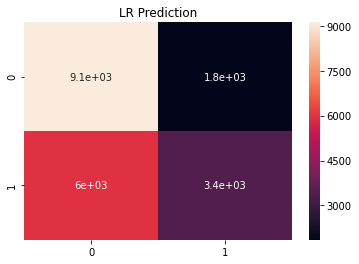

In [73]:
lrcls=LogisticRegression()
lrcls.fit(X_train,Y_train)
predictions=lrcls.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
conf_matrix=confusion_matrix(Y_validation,predictions)
print(conf_matrix)
print(classification_report(Y_validation,predictions))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True, ax=ax)
ax.set_title('LR Prediction')
plt.show()

#### Make predictions for LDA model

0.6095607742949789
[[9255 1714]
 [6233 3152]]
              precision    recall  f1-score   support

           0       0.60      0.84      0.70     10969
           1       0.65      0.34      0.44      9385

    accuracy                           0.61     20354
   macro avg       0.62      0.59      0.57     20354
weighted avg       0.62      0.61      0.58     20354



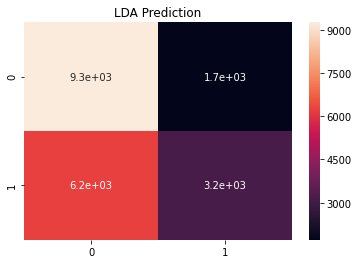

In [77]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions=lda.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
conf_matrix=confusion_matrix(Y_validation,predictions)
print(conf_matrix)
print(classification_report(Y_validation,predictions))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True, ax=ax)
ax.set_title('LDA Prediction')
plt.show()

#### Ensemble for bagging and boosting algorithms to check if accuracy is improved

In [78]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
 kfold = KFold(n_splits=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

AB: 0.620621 (0.005522)
GBM: 0.622157 (0.004820)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value o

RF: 0.582826 (0.004891)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value o

ET: 0.581806 (0.004808)


#### Compare bagging and boosting algorithms

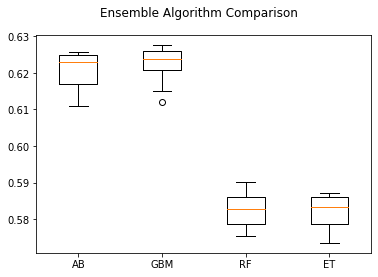

In [79]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()